# Classification
This notebook attempts to build a classifier using a random forest algorithm that identifies coherence scores (discrete integer categories from 1 to 5) accurate to human assessments. It includes the 22 derived linguistic features as input data and the human-generated coherence scores as target category labels. The random forest classifier is assembled using Scikit-learn, and various judgments of model performance (confusion matrix, accuracy scores, and macro or weighted metrics) are included.

In [228]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [229]:
# Loading the linguistic features and coherence scores
ling_features = pd.read_csv("linguistic_features/linguistic_feature_set.csv", index_col = 0)

# Creating data sets (feature scores, feature_data) and class target sets (coherence scores, coherence_data)
ling_features_array = np.array(ling_features)
feature_data = np.array(ling_features)[:, 1:]
coherence_data = ling_features_array[:, 0]

In [230]:
# Splitting data into training (2/3) and testing (1/3) sets
train_data, test_data, train_coherence, test_coherence = train_test_split(feature_data, coherence_data, test_size = 0.33, stratify = coherence_data, random_state = 42)

# Initializing a random forest classifier with 200 trees and fitting it to the data
rf_classifier = RandomForestClassifier(n_estimators = 200)
rf_classifier.fit(train_data, train_coherence)

# Predicting coherence scores based on the fit model with the testing data
pred_coherence = rf_classifier.predict(test_data)

# Calculating the accuracy score
accuracy = accuracy_score(test_coherence, pred_coherence)

# Printing model accuracy
print(f"Model accuracy was {(accuracy * 100):.2f}%")

Model accuracy was 52.77%


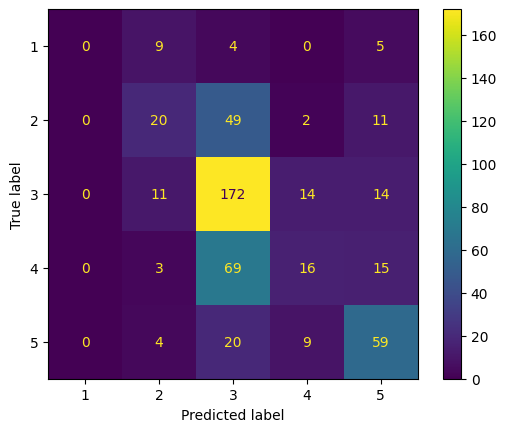

In [231]:
# Creating and displaying a confusion matrix for the classifier
matrix_calc = confusion_matrix(test_coherence, pred_coherence, labels = [1, 2, 3, 4, 5])
matrix = ConfusionMatrixDisplay(matrix_calc, display_labels = [1, 2, 3, 4, 5])
confusion_matrix_plot = matrix.plot()

In [232]:
# Creating and displaying a metric report for the classifier (precision, recall, F1 score, and macro/weighted averages)
report = classification_report(test_coherence, pred_coherence, target_names = ['1', '2', '3', '4', '5'], zero_division = 0.0)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.43      0.24      0.31        82
           3       0.55      0.82      0.66       211
           4       0.39      0.16      0.22       103
           5       0.57      0.64      0.60        92

    accuracy                           0.53       506
   macro avg       0.39      0.37      0.36       506
weighted avg       0.48      0.53      0.48       506



### Conclusions
The resultant random forest classifier has an accuracy of approximately 50% - 53%. Given that this is a five-class classification problem, this is an improvement over the accuracy that would be expected with random chance selection (~20%). However, it does not approach the industry standards for model performance (~70%) ***citation!!***, suggesting that ***this is not fully a good model for this. finish this!!!*** TODO